In [35]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Load the datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
# Display the first few rows of the training data to check if it's loaded correctly
print("Training Data:")
print(train_data.head())

Training Data:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesda

In [6]:
#Shape of the dataset
train_data.shape,test_data.shape

((20758, 18), (13840, 17))

In [7]:
#Information of Dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
#Stats Analysis of data
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
#Checking Missing Values
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
test_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

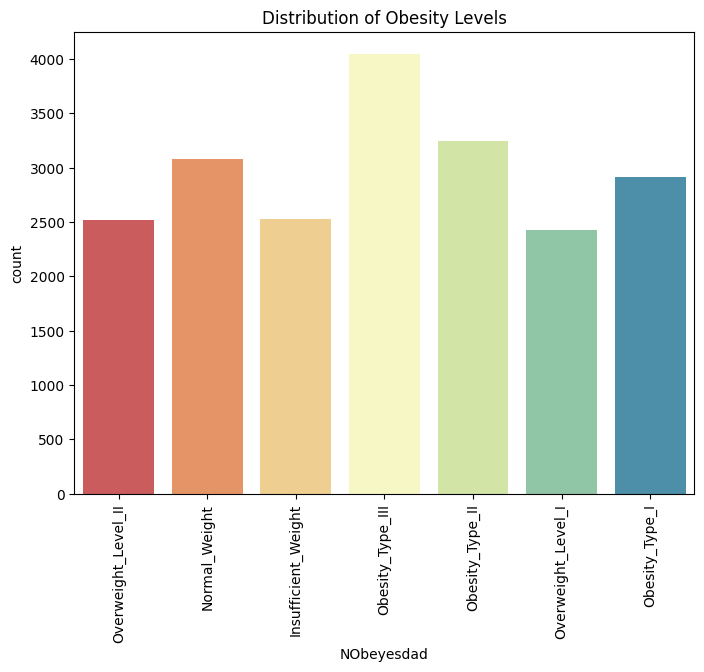

In [11]:
# Visualize the distribution of the target variable (NObeyesdad)

plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=train_data,palette='Spectral')
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

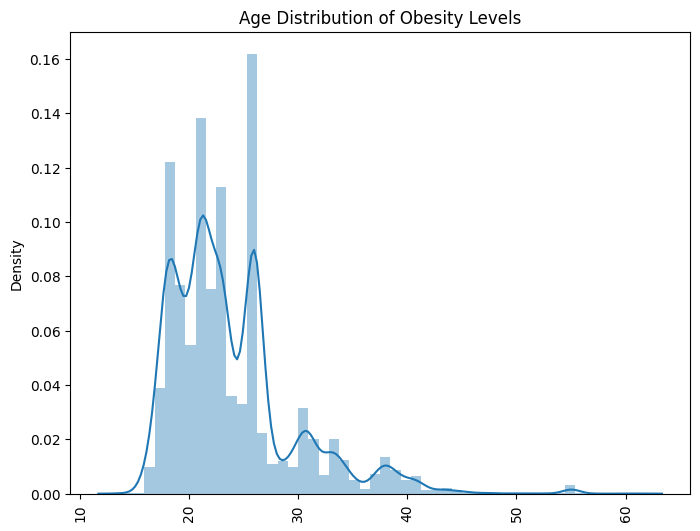

In [13]:
#Age Distribution with Target Varaible
plt.figure(figsize=(8, 6))
sns.distplot(x=train_data['Age'])
plt.title('Age Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

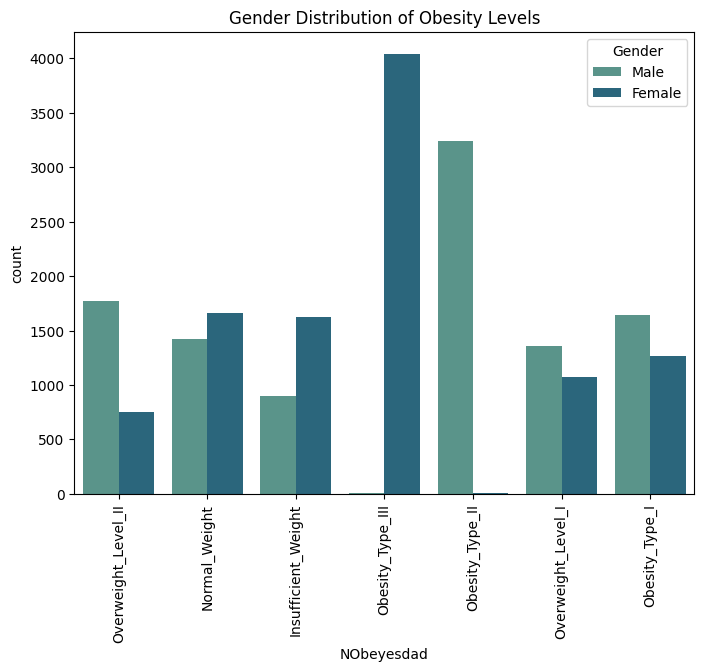

In [14]:
#Gender Distribution with Target Varaible
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', hue='Gender',data=train_data,palette='crest')
plt.title('Gender Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Encode target variable into numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['NObeyesdad'] = label_encoder.fit_transform(train_data['NObeyesdad'])

In [16]:
# Split features and target variable

X = train_data.drop(columns=['NObeyesdad'])
y = train_data['NObeyesdad']

In [17]:
# Define categorical and numerical features

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [18]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [32]:
# List of models to test
## Beginning Model Training
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Regressor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Regressor": RandomForestClassifier(),
    'xg boost':XGBClassifier()
   
}

In [33]:

# Dictionary to hold accuracy results
results = {}

# Loop through the models and evaluate them
for model_name, model in models.items():
    # Define the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy:.4f}')

# Display the results
print("\nModel Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Find the best model based on accuracy
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Logistic Regression Accuracy: 0.8668
K-Neighbors Regressor Accuracy: 0.7572
Decision Tree Accuracy: 0.8475
Random Forest Regressor Accuracy: 0.8866
xg boost Accuracy: 0.9020

Model Comparison:
Logistic Regression: 0.8668
K-Neighbors Regressor: 0.7572
Decision Tree: 0.8475
Random Forest Regressor: 0.8866
xg boost: 0.9020

Best Model: xg boost with Accuracy: 0.9020


In [41]:
# Cross-validate the best model
best_model = models[best_model_name]
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', best_model)])


In [42]:

cv_scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validated Accuracy for {best_model_name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated Accuracy for xg boost: 0.9048 ± 0.0039


In [43]:
# Preprocess the test data
X_test_final = test_data[numerical_features + categorical_features]

In [44]:
pipeline.fit(X, y)  # Fit the model on the entire training data
predictions = pipeline.predict(X_test_final)

In [45]:
predictions

array([3, 5, 4, ..., 0, 1, 3], dtype=int64)

In [46]:
# Optionally, save predictions to a CSV file
submission = pd.DataFrame({'id': test_data['id'], 'predictions': predictions})  # Replace 'id' with your identifier column
submission.to_csv('submission.csv', index=False)

In [47]:
submission

,id,predictions
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4
...,...,...
13835,34593,6
13836,34594,5
13837,34595,0
13838,34596,1
